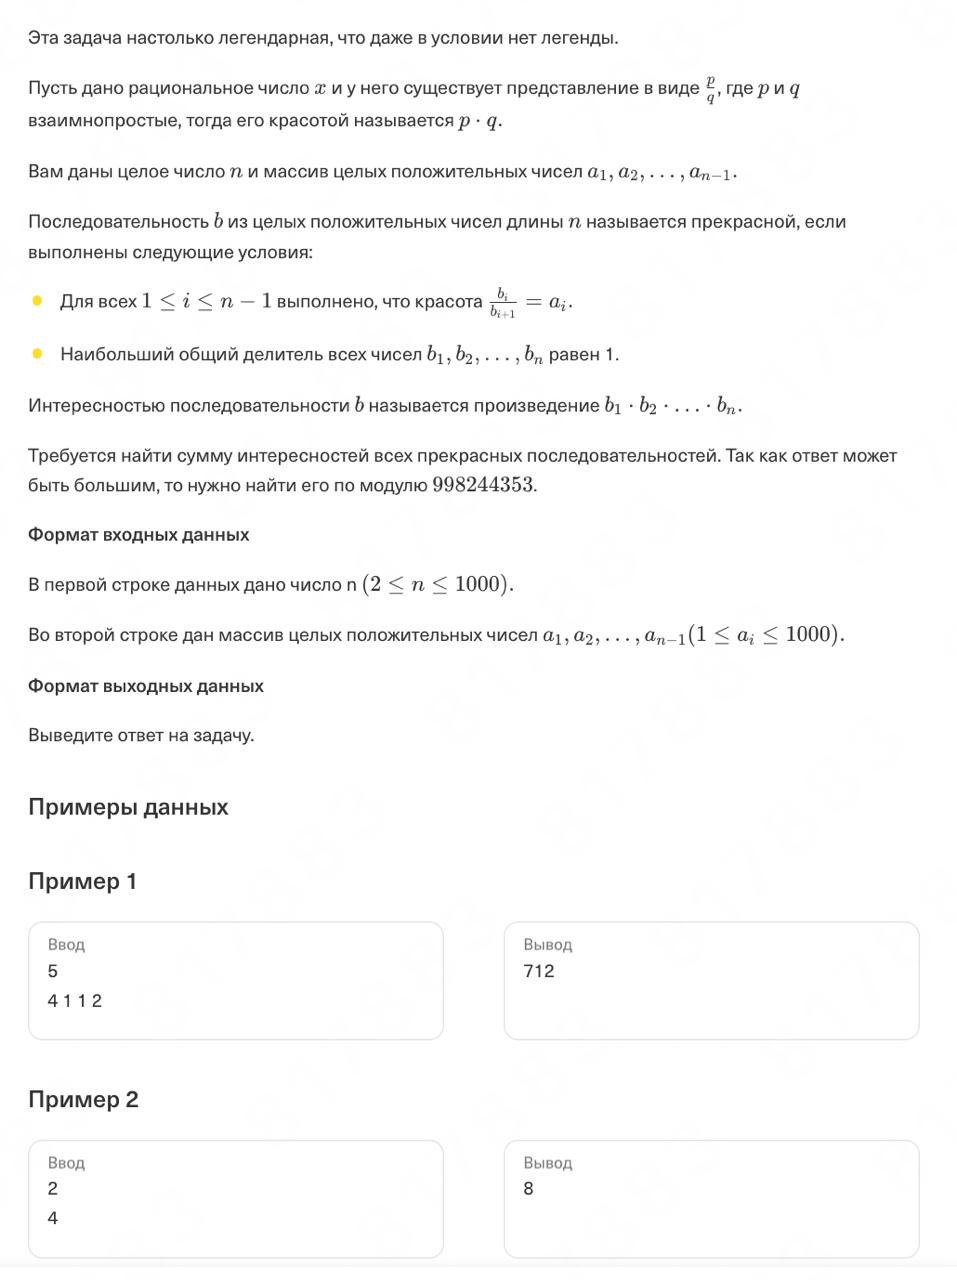

In [ ]:
def solve():
    n = int(input())
    a = list(map(int, input().split()))

    def gcd(a, b):
        if b == 0:
            return a
        return gcd(b, a % b)

    def calculate_sequences():
        sequences = []

        def find_sequences(current_sequence):
            if len(current_sequence) == n:
                if gcd_sequence(current_sequence) == 1:
                    sequences.append(current_sequence)
                return

            if len(current_sequence) == 0:
                for i in range(1, 1001):
                    find_sequences([i])
            else:
                last_val = current_sequence[-1]
                index = len(current_sequence) - 1

                possible_next_vals = set() # Используем set, чтобы избежать дубликатов

                if index < len(a): #Если индекс a не выходит за границы массива a
                    if a[index] != 0 and last_val % a[index] == 0:
                        possible_next_val = last_val // a[index]
                        if possible_next_val > 0 and possible_next_val <= 1000:
                            possible_next_vals.add(possible_next_val)
                    possible_next_val2 = last_val * a[index]
                    if possible_next_val2 <= 1000:
                        possible_next_vals.add(possible_next_val2)
                else:
                    # Если индекс a выходит за границы массива, нужно сделать чтобы количество элементов в b == n
                    # В этом случае, просто перебираем числа от 1 до 1000, чтобы удовлетворить условию len(b) == n
                    for i in range(1, 1001):
                        possible_next_vals.add(i)

                for next_val in possible_next_vals:
                    new_sequence = current_sequence + [next_val]
                    find_sequences(new_sequence)

        find_sequences([])
        return sequences

    def gcd_sequence(seq):
        result = seq[0]
        for i in range(1, len(seq)):
            result = gcd(result, seq[i])
        return result

    sequences = calculate_sequences()

    total_interest = 0
    for seq in sequences:
        interest = 1
        for val in seq:
            interest = (interest * val) % 998244353
        total_interest = (total_interest + interest) % 998244353

    print(total_interest)


solve()

2
4
8


In [ ]:
def solve():
    n = int(input())
    a = list(map(int, input().split()))

    def gcd(a, b):
        if b == 0:
            return a
        return gcd(b, a % b)

    def gcd_sequence(seq):
        result = seq[0]
        for i in range(1, len(seq)):
            result = gcd(result, seq[i])
        return result

    memo = {}

    def calculate_sequences():
        sequences = []

        def find_sequences(current_sequence):

            key = tuple(current_sequence)
            if key in memo:
                return memo[key]

            if len(current_sequence) == n:
                if gcd_sequence(current_sequence) == 1:
                    sequences.append(current_sequence)
                memo[key] = None
                return None

            if len(current_sequence) == 0:
                for i in range(1, 1001):
                    find_sequences([i])
            else:
                last_val = current_sequence[-1]
                index = len(current_sequence) - 1

                possible_next_vals = set()

                if index < len(a):
                    if a[index] != 0 and last_val % a[index] == 0:
                        possible_next_val = last_val // a[index]
                        if possible_next_val > 0 and possible_next_val <= 1000:
                            possible_next_vals.add(possible_next_val)
                    possible_next_val2 = last_val * a[index]
                    if possible_next_val2 <= 1000:
                        possible_next_vals.add(possible_next_val2)
                else:

                    for i in range(1, 1001):
                        possible_next_vals.add(i)

                for next_val in possible_next_vals:
                    new_sequence = current_sequence + [next_val]
                    find_sequences(new_sequence)

            memo[key] = None
            return None

        find_sequences([])
        return sequences

    sequences = calculate_sequences()

    total_interest = 0
    for seq in sequences:
        interest = 1
        for val in seq:
            interest = (interest * val) % 998244353
        total_interest = (total_interest + interest) % 998244353

    print(total_interest)

solve()

5
4 1 1 2
712
